In [1]:
%pip install .. --force-reinstall --upgrade --no-deps --no-cache-dir

Processing /home/sarverott/__WORKSHOP/forge/Apokryf_Institute_of_Technomantic_Research/laughing-computing-machine
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for tickable: filename=tickable-0.2.0-py3-none-any.whl size=11409 sha256=f7cfa2aa94a3e5321bc74c40b3bacb4b97d332625110206c52a08188ec3a8c45
  Stored in directory: /tmp/pip-ephem-wheel-cache-nkos8inp/wheels/d5/91/02/f06736188fd12fa44957303ad1cffb3fca5de8939ff4514a98
Successfully built tickable
  Attempting uninstall: tickable
    Found existing installation: tickable 0.2.0
    Uninstalling tickable-0.2.0:
      Successfully uninstalled tickable-0.2.0
Note: you may need to restart the kernel to use updated packages.


In [2]:
import tickable



/home/sarverott/__WORKSHOP/forge/Apokryf_Institute_of_Technomantic_Research/laughing-computing-machine/.venv/lib/python3.12/site-packages/deap/creator.py:185: RuntimeWarning: A class named 'FitnessMax' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "
/home/sarverott/__WORKSHOP/forge/Apokryf_Institute_of_Technomantic_Research/laughing-computing-machine/.venv/lib/python3.12/site-packages/deap/creator.py:185: RuntimeWarning: A class named 'Individual' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "


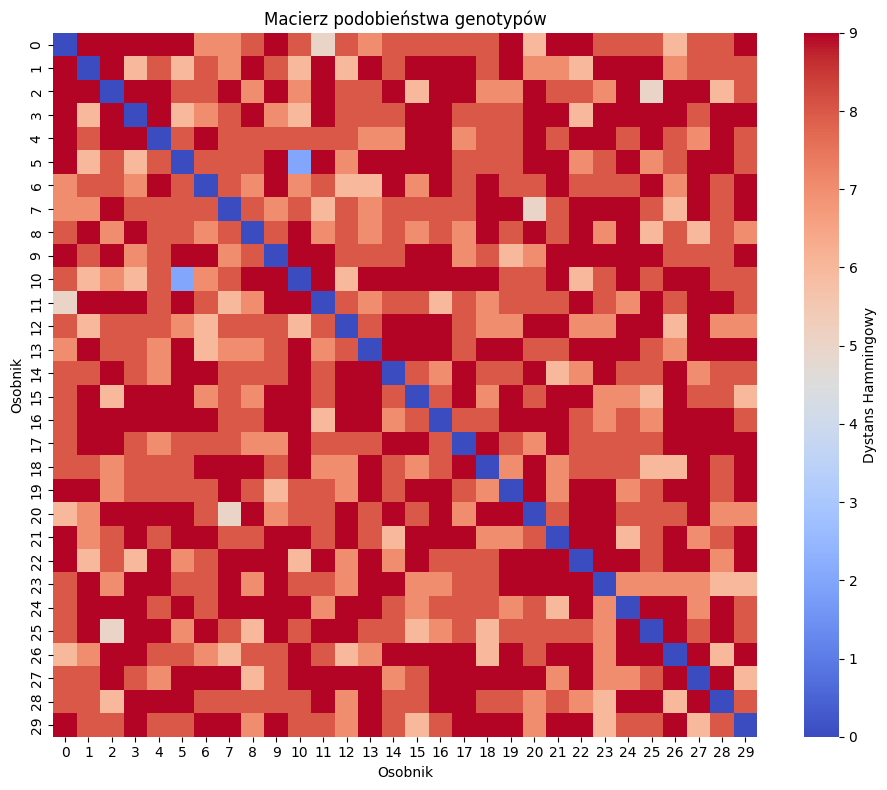

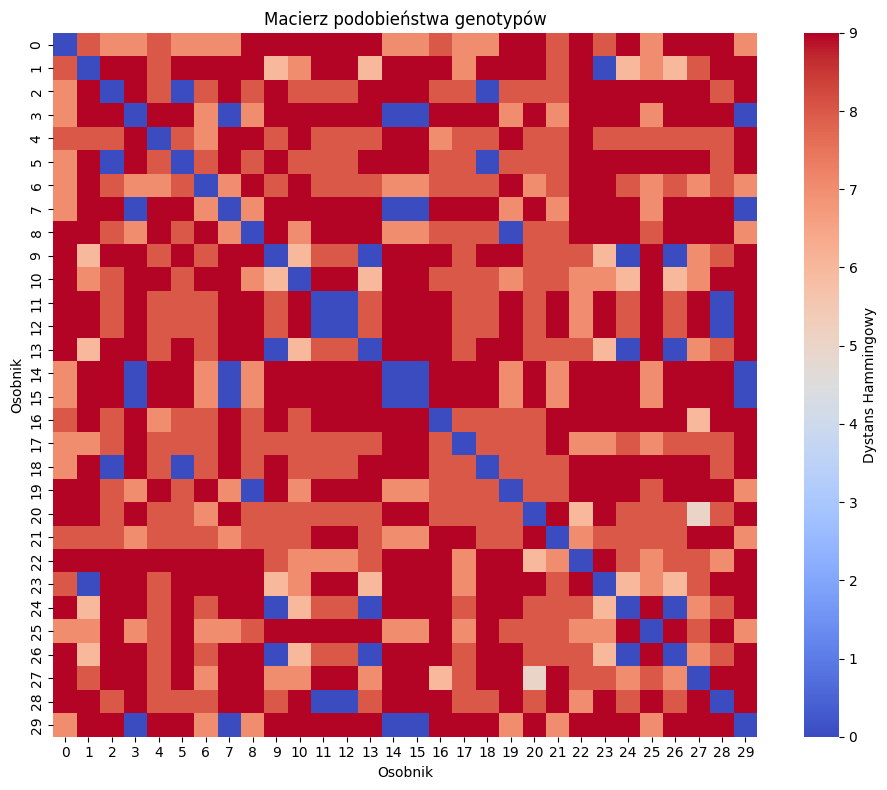

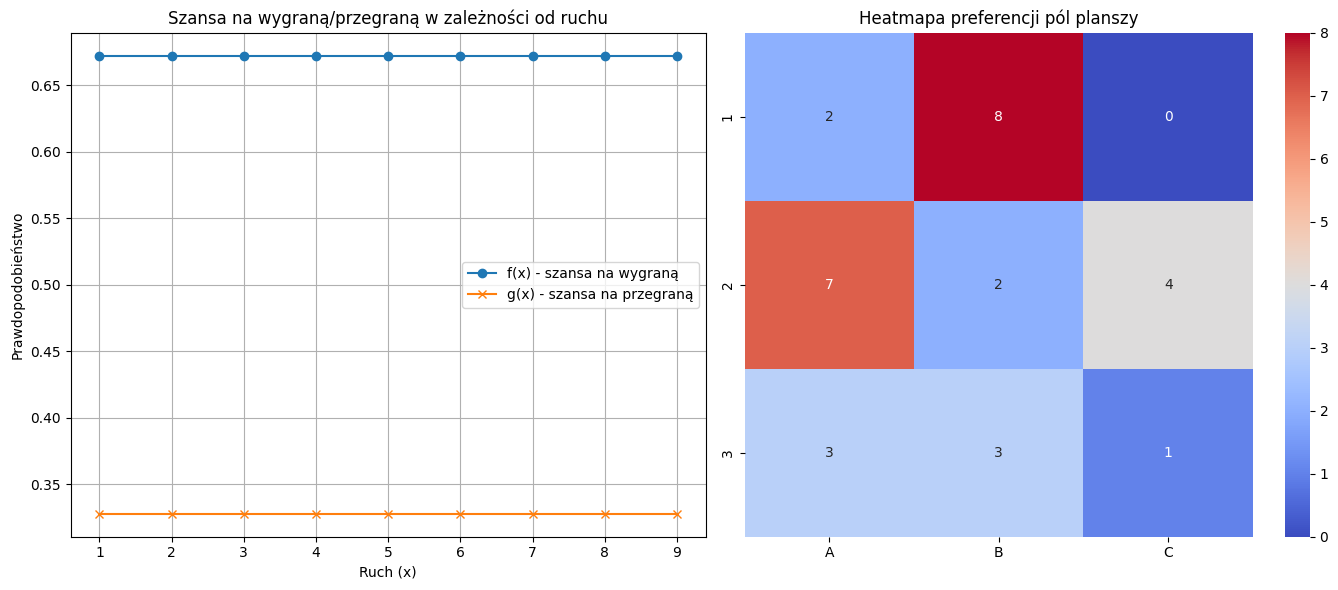

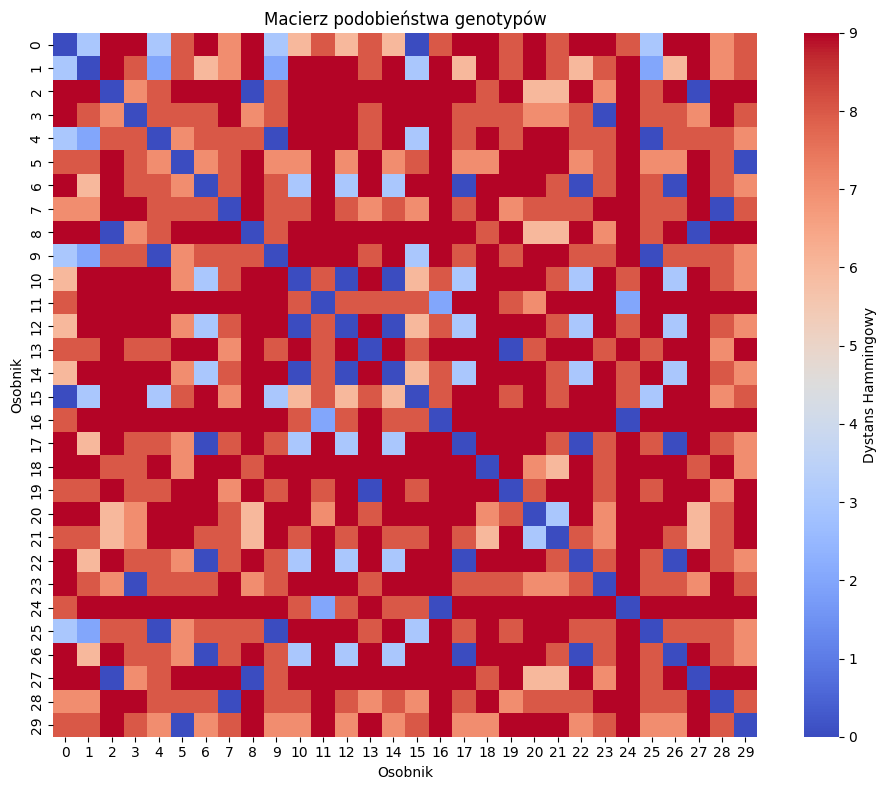

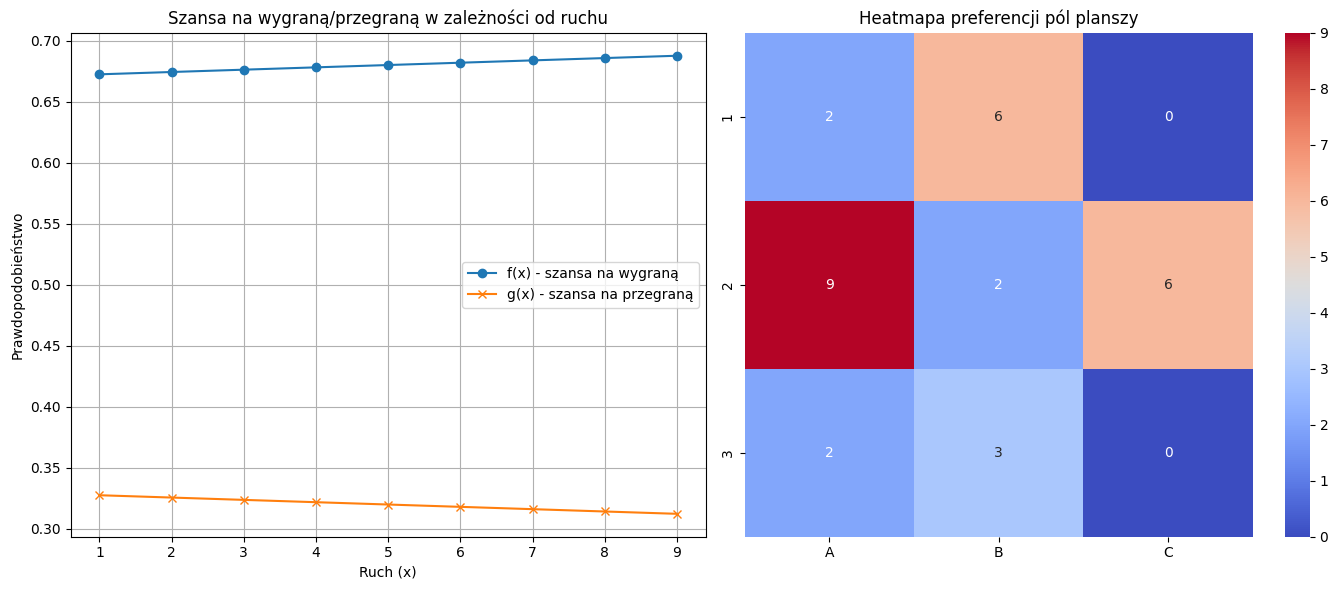

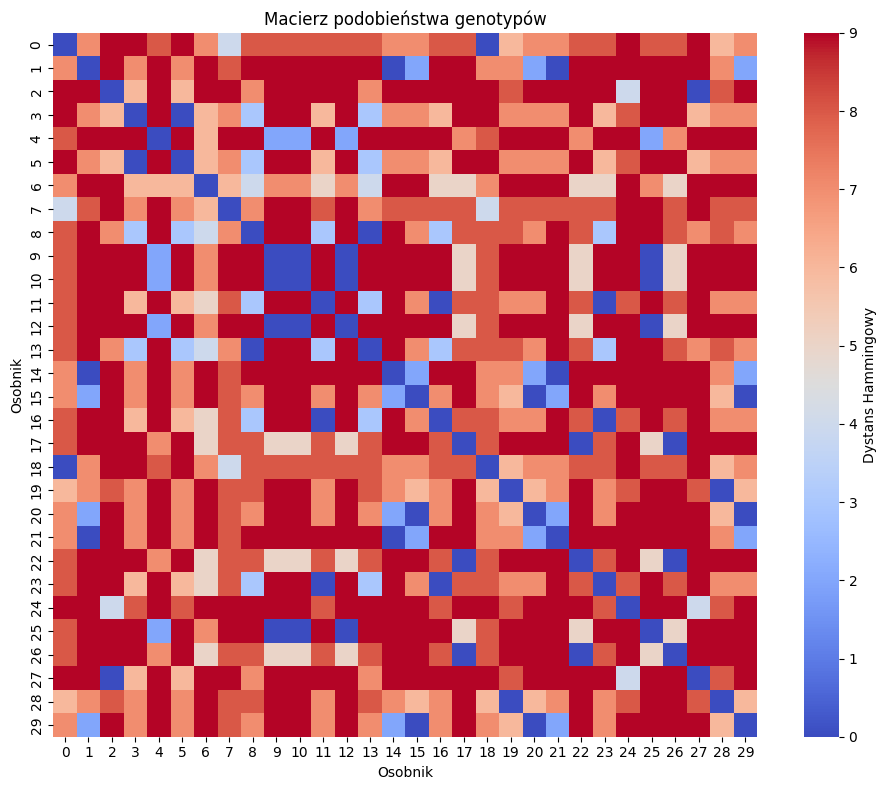

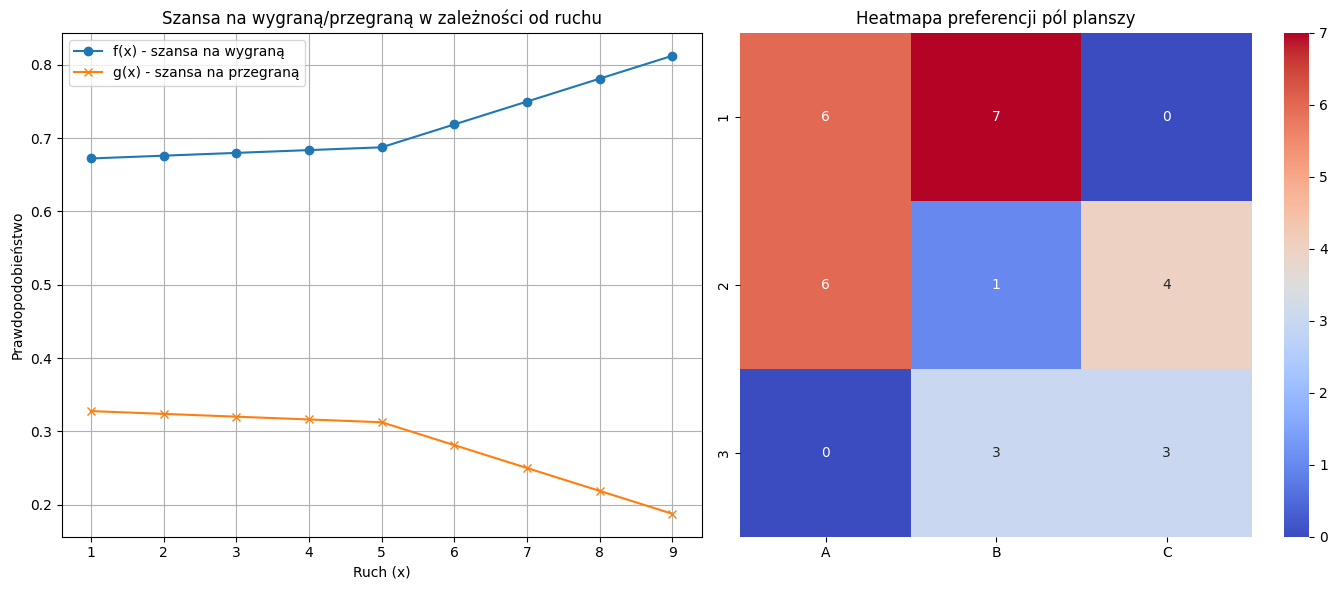

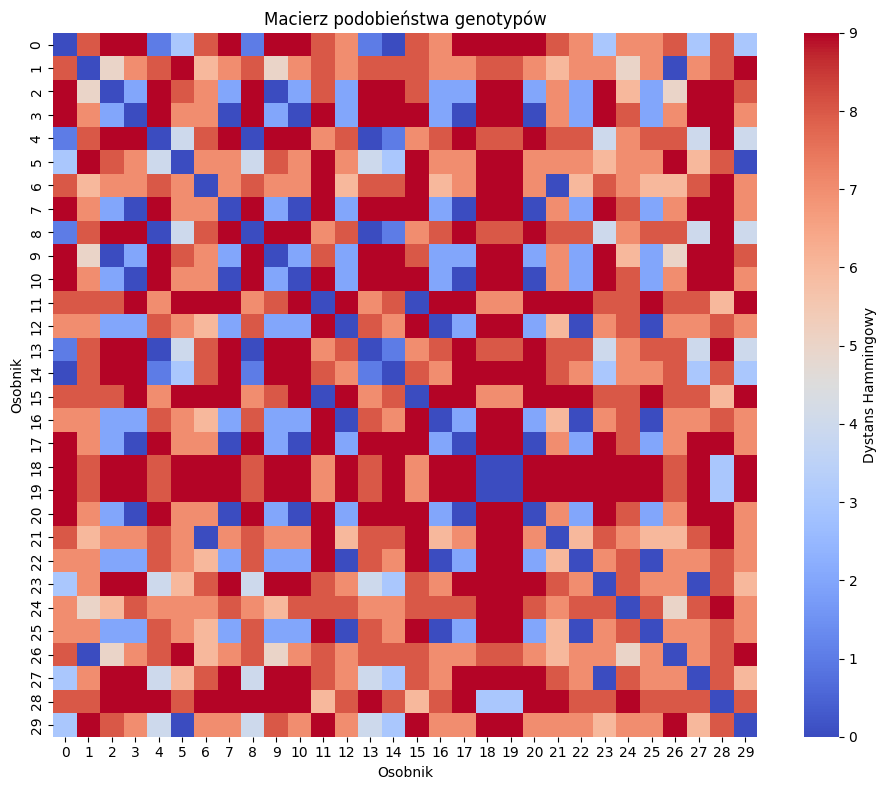

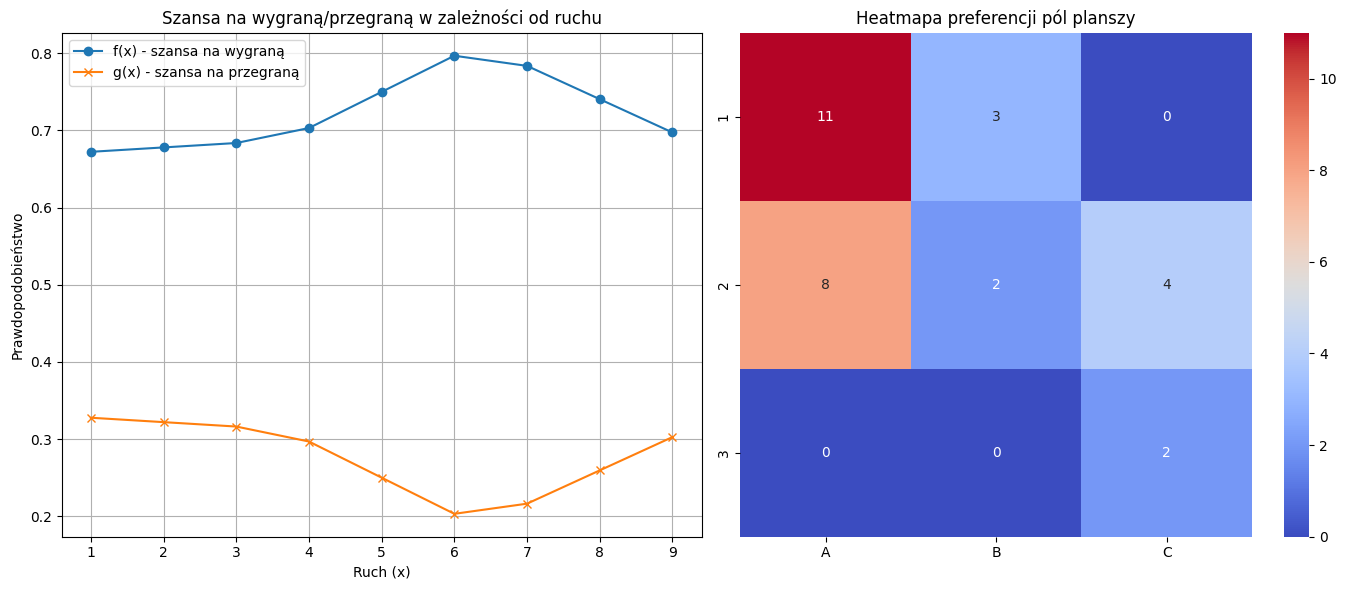

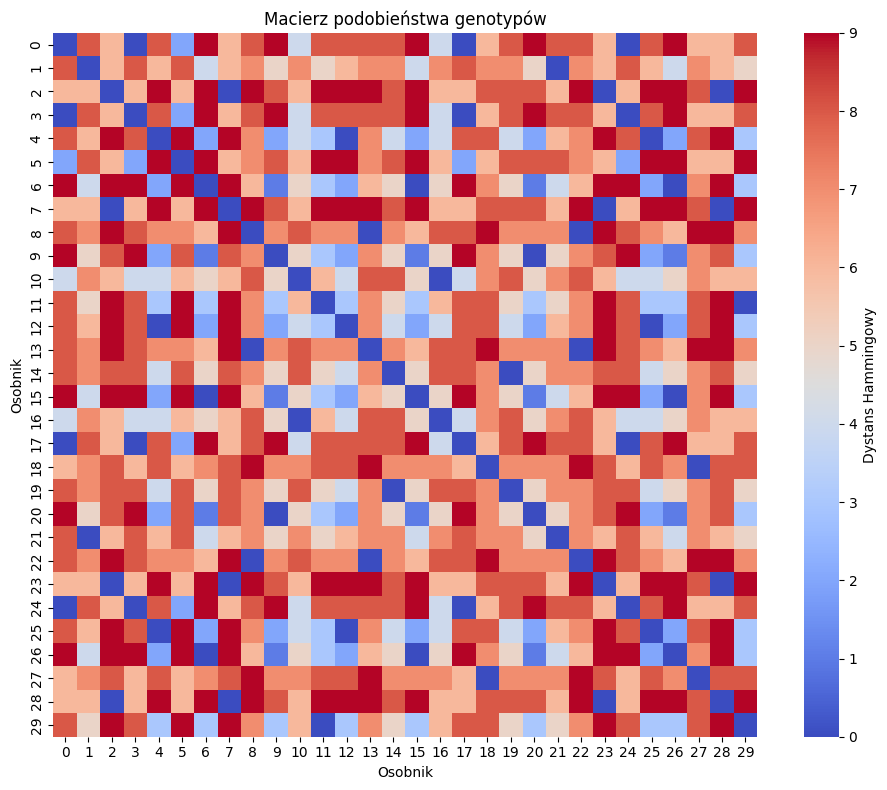

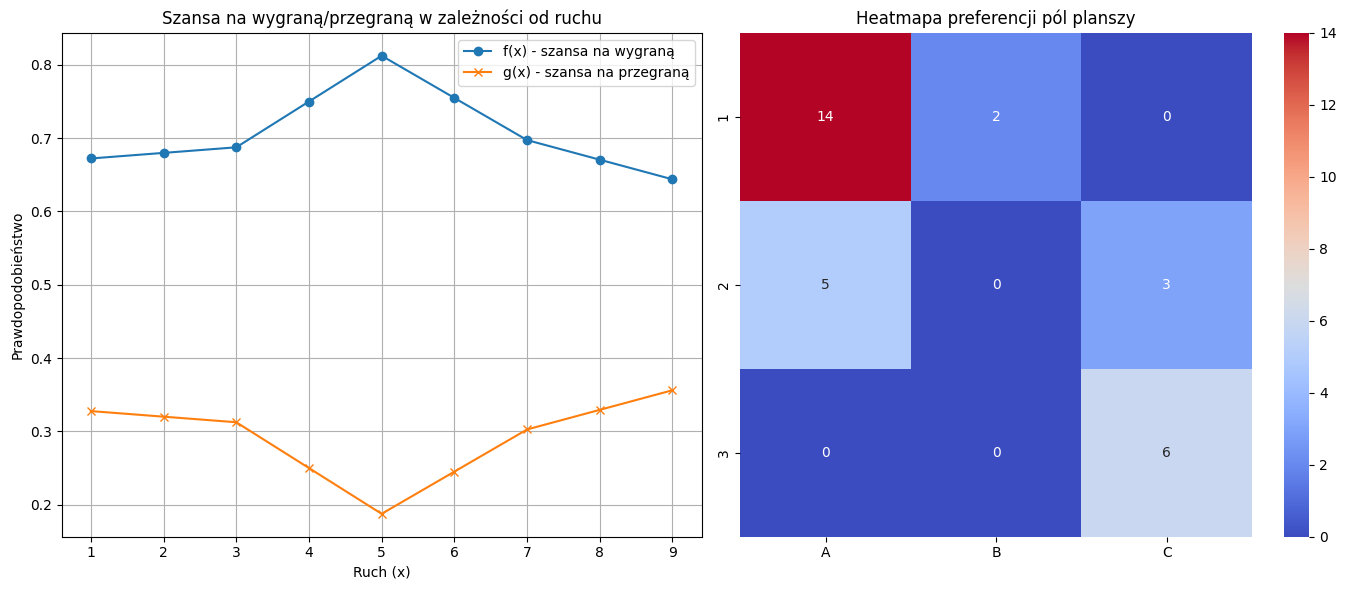

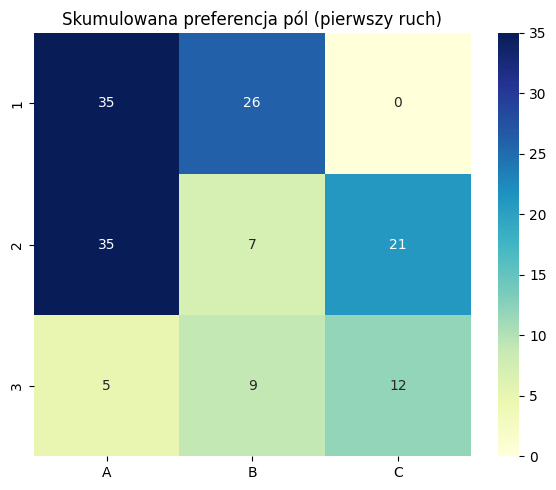

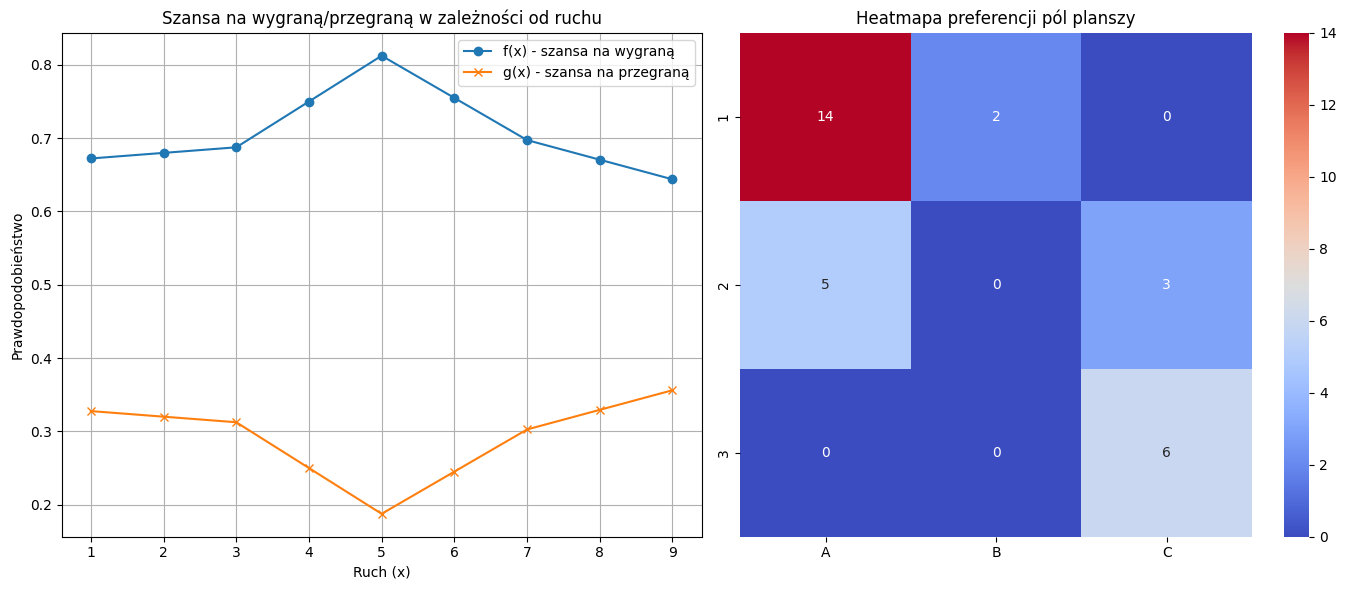

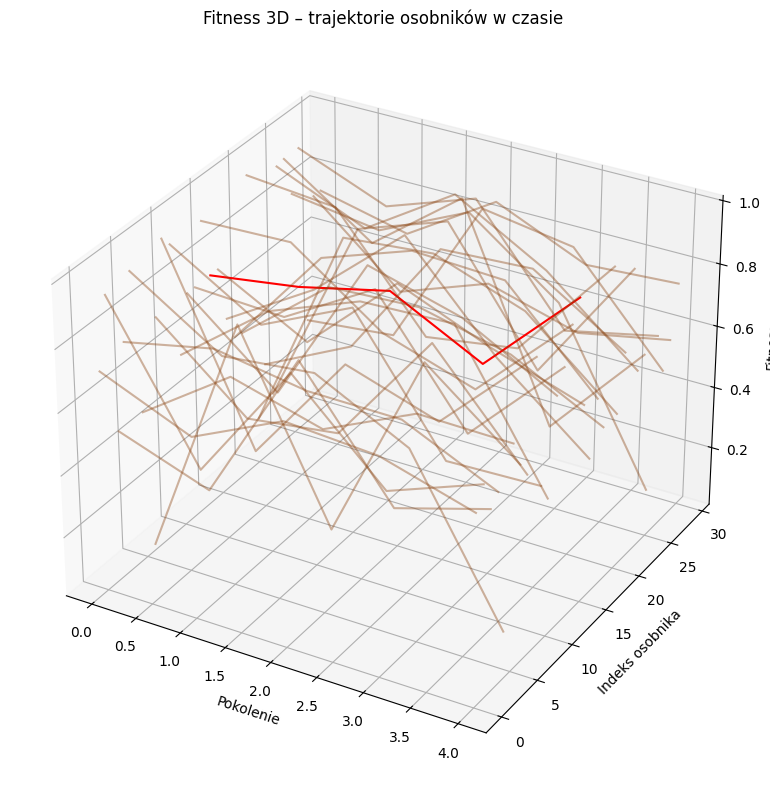

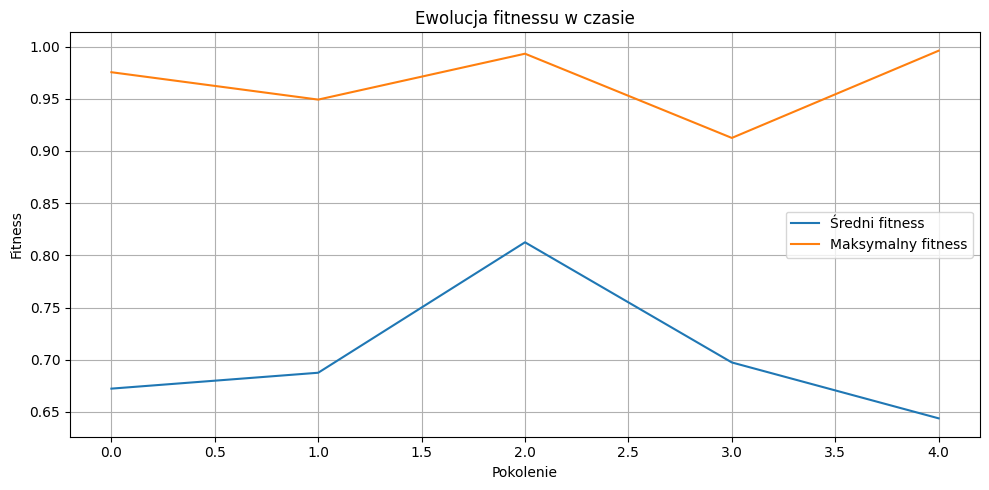

In [13]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from deap import creator, base, tools, algorithms
import random

import tickable.helpers
from tickable.genealogers import chaos_evaluate
from tickable.plots import plot_first_move_preference, plot_genome_similarity, game_predictions, plot_fitness_3d, plot_fitness_over_time

# Przygotowanie środowiska DEAP
creator.create("FitnessMax", base.Fitness, weights=(1.0,))
creator.create("Individual", list, fitness=creator.FitnessMax)

toolbox = base.Toolbox()
toolbox.register("attr_perm", random.sample, range(9), 9)
toolbox.register("individual", tools.initIterate, creator.Individual, toolbox.attr_perm)
toolbox.register("population", tools.initRepeat, list, toolbox.individual)

# Losowa funkcja oceny — tylko do symulacji wizualizacji
def dummy_evaluate(individual):
    return (random.uniform(0, 1),)

toolbox.register("evaluate", dummy_evaluate)
toolbox.register("mate", tools.cxTwoPoint)
toolbox.register("mutate", tools.mutShuffleIndexes, indpb=0.2)
toolbox.register("select", tools.selTournament, tournsize=3)

# --- Symulacja ewolucji + agregacja statystyk ---
pop = toolbox.population(n=30)

plot_genome_similarity(pop)

fitness_history = []
preference_census = []

for gen in range(5):
    offspring = algorithms.varAnd(pop, toolbox, cxpb=0.5, mutpb=0.2)
    fits = list(map(toolbox.evaluate, offspring))
    for ind, fit in zip(offspring, fits):
        ind.fitness.values = fit
    pop = toolbox.select(offspring, k=len(pop))
    plot_genome_similarity(pop)
    # --- Statystyki generacyjne ---
    fitness_vals = [ind.fitness.values[0] for ind in pop]
    fitness_history.append(fitness_vals)

    # Preferencje strategii dla heatmapy (agregujemy "pierwsze ruchy")
    
    first_move_counts = np.zeros(9)
    for ind in pop:
        first_move_counts[ind[0]] += 1
    preferences = first_move_counts.reshape(3, 3)
    preference_census.append(preferences)
    game_predictions(
        tickable.helpers.make_histogram(fitness_history), 
        preference_census[-1]
    )


#final_prefs = preference_census[-1]

# --- Narzędzie wizualizacyjne ---
plot_first_move_preference(preference_census)

game_predictions(
    tickable.helpers.make_histogram(fitness_history), 
    preference_census[-1]
)

plot_fitness_3d(fitness_history)

plot_fitness_over_time(fitness_history)



/home/sarverott/__WORKSHOP/forge/Apokryf_Institute_of_Technomantic_Research/laughing-computing-machine/.venv/lib/python3.12/site-packages/deap/creator.py:185: RuntimeWarning: A class named 'FitnessMax' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "
/home/sarverott/__WORKSHOP/forge/Apokryf_Institute_of_Technomantic_Research/laughing-computing-machine/.venv/lib/python3.12/site-packages/deap/creator.py:185: RuntimeWarning: A class named 'Individual' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "


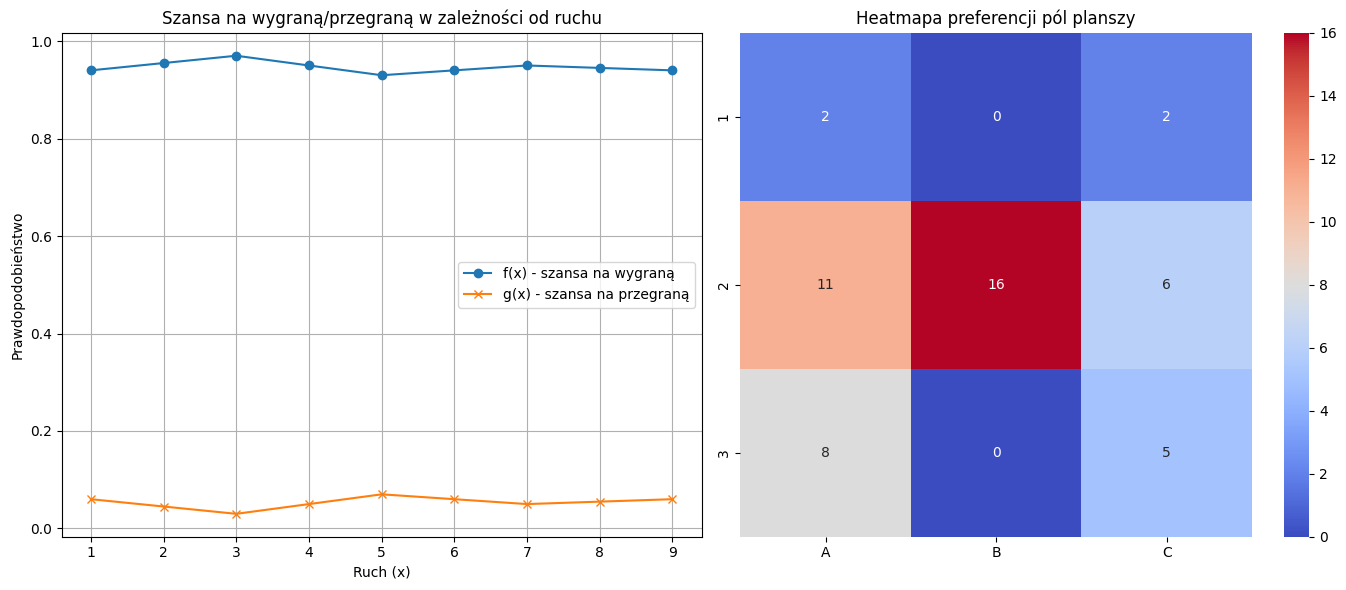

In [4]:
from tickable.genealogers import MutatorManager, chaos_evaluate
from tickable.helpers import make_histogram
from tickable.plots import game_predictions

testgen = MutatorManager()
testgen.configure()
results = testgen.generate(chaos_evaluate,50,5)
game_predictions(
    make_histogram(
        results["fit_story"]
    ),
    results["census"]
)

In [5]:
from importlib import reload  # Python 3.4+
import tickable
tickable = reload(tickable)

In [6]:
from tickable.plots import plot_first_move_preference, plot_fitness_over_time

results
#plot_first_move_preference(results["fit_story"])
#plot_fitness_over_time(results["fit_story"])

{'fit_story': [[1.0,
   1.0,
   1.0,
   1.0,
   1.0,
   1.0,
   1.0,
   1.0,
   1.0,
   0.5,
   1.0,
   1.0,
   1.0,
   1.0,
   1.0,
   1.0,
   0.5,
   1.0,
   1.0,
   0.5,
   1.0,
   1.0,
   1.0,
   1.0,
   1.0,
   1.0,
   0.5,
   1.0,
   1.0,
   1.0,
   1.0,
   1.0,
   1.0,
   1.0,
   1.0,
   1.0,
   1.0,
   1.0,
   1.0,
   0.5,
   1.0,
   1.0,
   0.5,
   1.0,
   1.0,
   1.0,
   1.0,
   1.0,
   1.0,
   1.0],
  [1.0,
   1.0,
   1.0,
   0.5,
   1.0,
   1.0,
   1.0,
   1.0,
   1.0,
   1.0,
   1.0,
   1.0,
   1.0,
   1.0,
   1.0,
   1.0,
   1.0,
   1.0,
   1.0,
   1.0,
   1.0,
   1.0,
   1.0,
   1.0,
   1.0,
   1.0,
   1.0,
   1.0,
   0.5,
   1.0,
   1.0,
   1.0,
   1.0,
   1.0,
   1.0,
   1.0,
   1.0,
   1.0,
   1.0,
   1.0,
   1.0,
   1.0,
   1.0,
   1.0,
   1.0,
   1.0,
   0.5,
   1.0,
   1.0,
   1.0],
  [1.0,
   1.0,
   1.0,
   1.0,
   1.0,
   1.0,
   1.0,
   1.0,
   0.0,
   1.0,
   1.0,
   1.0,
   1.0,
   1.0,
   1.0,
   1.0,
   1.0,
   1.0,
   1.0,
   1.0,
   1.0,
   1.0,
   1.0,
 

In [7]:
#plot_first_move_preference(results["census"])
#plot_fitness_over_time(results["fit_story"])

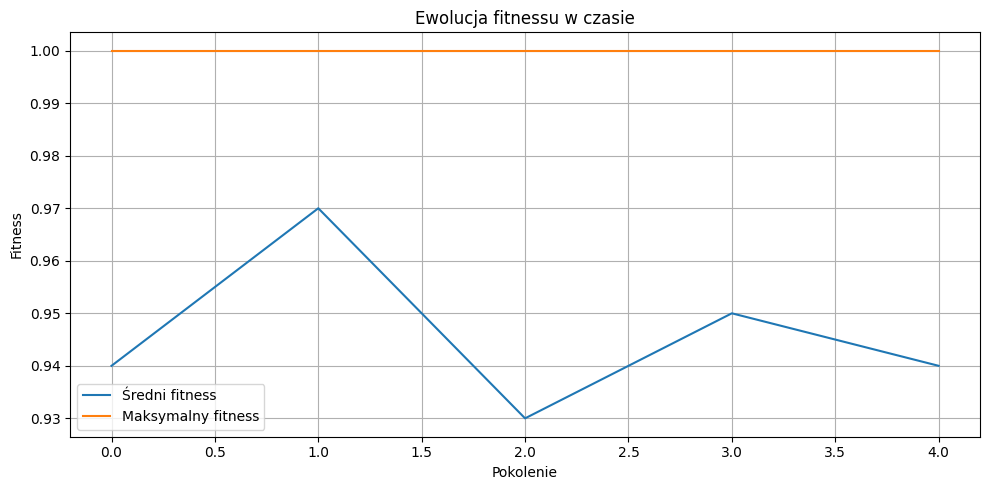

In [8]:
#plot_first_move_preference(results["fit_story"])
plot_fitness_over_time(results["fit_story"])

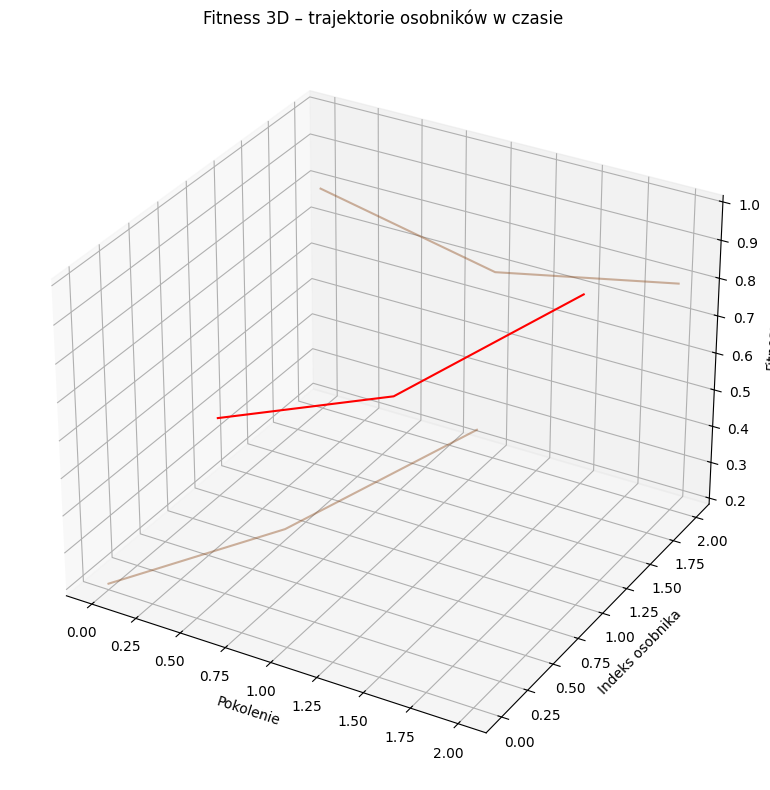

In [9]:
from tickable.plots import plot_fitness_3d

sample_fitness_story = [[0.2, 0.4, 0.8], [0.5, 0.6, 0.7], [0.9, 1.0, 0.8]]

plot_fitness_3d(sample_fitness_story)



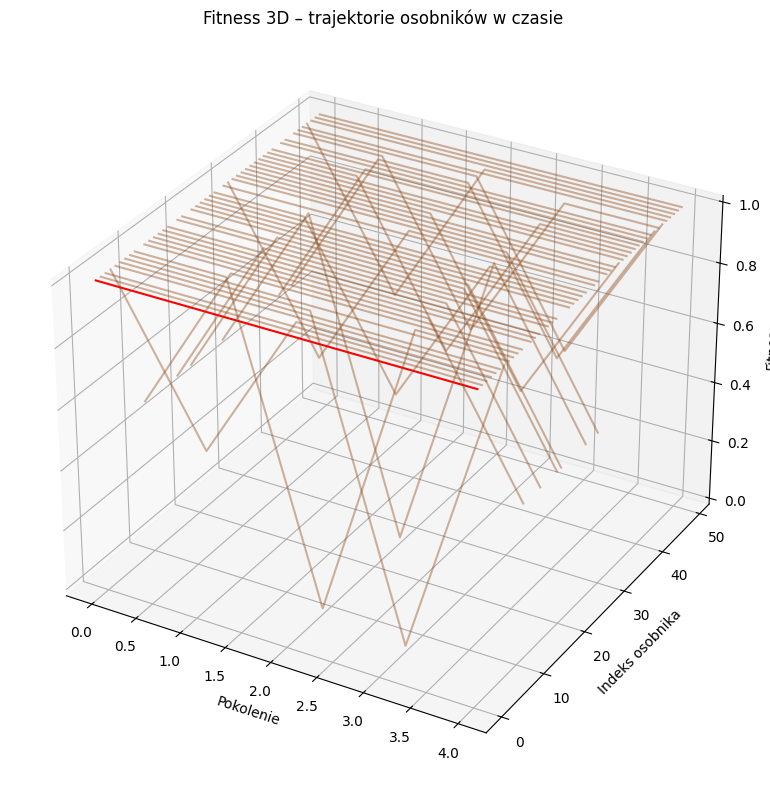

In [10]:
plot_fitness_3d(results["fit_story"])

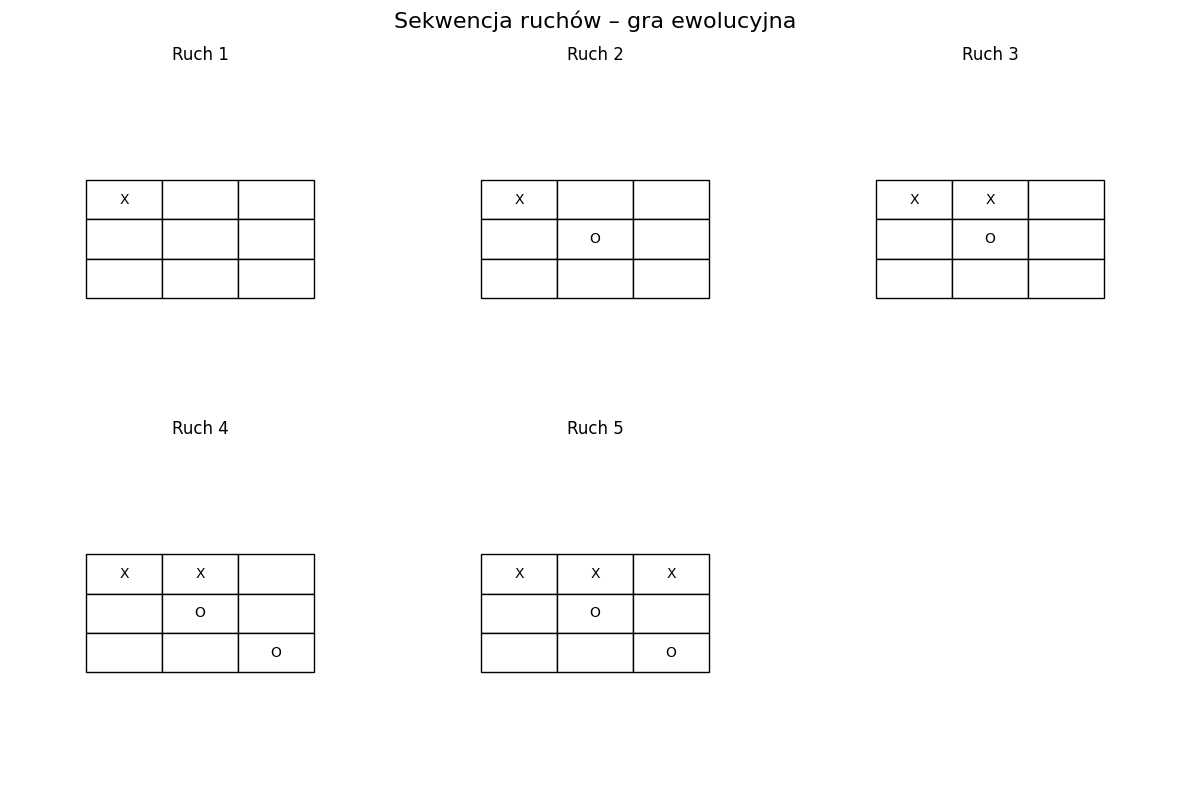

In [11]:
# Reimport wymaganych modułów po resecie stanu
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.gridspec as gridspec

# Funkcja do wizualizacji sekwencji ruchów
def plot_game_sequence(game):
    states = []
    board = np.zeros_like(game.board)
    for who, move in game.movestory:
        x, y = move
        board_copy = board.copy()
        board_copy[x * 3 + y] = -1 if who == "Evo" else 1
        states.append(board_copy.reshape(3, 3))
        board[x * 3 + y] = -1 if who == "Evo" else 1

    num_states = len(states)
    cols = 3
    rows = int(np.ceil(num_states / cols))

    fig = plt.figure(figsize=(4 * cols, 4 * rows))
    spec = gridspec.GridSpec(rows, cols, figure=fig)

    for idx, state in enumerate(states):
        ax = fig.add_subplot(spec[idx])
        table_data = [["X" if val == -1 else "O" if val == 1 else "" for val in row] for row in state]
        table = ax.table(cellText=table_data, loc='center', cellLoc='center', colWidths=[0.2]*3)
        table.scale(1, 2)
        ax.axis('off')
        ax.set_title(f"Ruch {idx+1}", pad=10)

    fig.suptitle("Sekwencja ruchów – gra ewolucyjna", fontsize=16)
    plt.tight_layout()
    plt.show()

# Przykładowa gra (mock)
class MockGame:
    def __init__(self):
        self.movestory = [
            ("Evo", (0, 0)), ("Chaos", (1, 1)),
            ("Evo", (0, 1)), ("Chaos", (2, 2)),
            ("Evo", (0, 2))  # zwycięstwo X
        ]
        self.board = np.zeros(9)

mock_game = MockGame()
plot_game_sequence(mock_game)

In [12]:
# from deap import creator, base, tools
# import random
# from tickable.genealogers import chaos_evaluate
# from 

# game = games.TicTacToe() 
# # przeniesienie do scope kontekstu całego modułu ułatwiło mi ustalanie czemu nic się nie działo

# creator.create("FitnessMax", base.Fitness, weights=(1.0,))
# creator.create("Individual", list, fitness=creator.FitnessMax)

# toolbox = base.Toolbox()
# toolbox.register("attr_perm", random.sample, range(9), 9)
# toolbox.register("individual", tools.initIterate, creator.Individual, toolbox.attr_perm)
# toolbox.register("evaluate", evaluate)



# ind = toolbox.individual()
# print("Strategia:", ind)
# print("Fitness:", toolbox.evaluate(ind))

# print(game.state())

# display_game_state(game) 
# # po to były wcześniejsze plotery - multipredykcja pospolitego aktualnie
# # codzienne zakładanie następstw na podstawie założeń wysnutych 
# # z doświadczeń przy danej kategorii mindsetowej... trik interdyscyplinarności paralaplace 
# # w oczach poniższych bytów, które nie wykrywają kontekstualiów danego zagadnienia i/lub przestrzeni 
# # pojęć, np: nieprogramista w przestrzeni pojęć programistycznych